In [38]:
import pyrealsense2 as rs
import open3d as o3d
import numpy as np


In [39]:
torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [40]:

class BitMap():
    # create a numpy array for each object
    def __init__(self):
        self.background = np.zeros((640,480)) # 0
        self.aeroplane = np.zeros((640,480)) # 1
        self.bicycle = np.zeros((640,480)) # 2 
        self.bird = np.zeros((640,480))  # 3
        self.boat = np.zeros((640,480)) # 4
        self.bottle = np.zeros((640,480))  # 5
        self.bus = np.zeros((640,480)) # 6
        self.car = np.zeros((640,480)) # 7
        self.cat = np.zeros((640,480)) # 8
        self.chair = np.zeros((640,480)) # 9
        self.cow = np.zeros((640,480)) # 10
        self.dining_table = np.zeros((640,480)) # 11
        self.dog = np.zeros((640,480)) # 12
        self.horse = np.zeros((640,480)) # 13
        self.motorbike = np.zeros((640,480)) # 14
        self.person = np.zeros((640,480)) # 15
        self.potted_plant = np.zeros((640,480)) # 16
        self.sheep = np.zeros((640,480)) # 17
        self.sofa = np.zeros((640,480)) # 18
        self.train = np.zeros((640,480)) # 19
        self.tv = np.zeros((640,480)) #20
            
    def update(self, labels):
        # convert mask (0-255) to np.array
        # the '+ 0' is to convert the true/false values to 1/0
        self.background = (labels==0) + 0 
        self.aeroplane = (labels==1) + 0
        self.bicycle = (labels==2) + 0
        self.bird = (labels==3) + 0
        self.boat = (labels==4) + 0
        self.bottle = (labels==5) + 0
        self.bus = (labels==6) + 0
        self.car = (labels==7) + 0
        self.cat = (labels==8) + 0
        self.chair = (labels==9) + 0
        self.cow = (labels==10) + 0
        self.dining_table = (labels==11) + 0
        self.dog = (labels==12) + 0
        self.horse = (labels==13) + 0
        self.motorbike = (labels==14) + 0
        self.person = (labels==15) + 0
        self.potted_plant = (labels==16) + 0
        self.sheep = (labels==17) + 0
        self.sofa = (labels==18) + 0
        self.train = (labels==19) + 0
        self.tv = (labels==20) + 0
        
    def getPresentClassesStr(self):
        classes = ''
        if 1 in self.background:
            classes += 'background\n'
        if 1 in self.aeroplane:
            classes += 'aeroplane\n'
        if 1 in self.bicycle:
            classes += 'bicycle\n'
        if 1 in self.bird:
            classes += 'bird\n'
        if 1 in self.boat:
            classes += 'boat\n'
        if 1 in self.bottle:
            classes += 'bottle\n'
        if 1 in self.bus:
            classes += 'bus\n'
        if 1 in self.car:
            classes += 'car\n'
        if 1 in self.cat:
            classes += 'cat\n'
        if 1 in self.chair:
            classes += 'chair\n'
        if 1 in self.cow:
            classes += 'cow\n'
        if 1 in self.dining_table:
            classes += 'dining_table\n'
        if 1 in self.dog:
            classes += 'dog\n'
        if 1 in self.horse:
            classes += 'horse\n'
        if 1 in self.motorbike:
            classes += 'motorbike\n'
        if 1 in self.person:
            classes += 'person\n'
        if 1 in self.potted_plant:
            classes += 'potted_plant\n'
        if 1 in self.sheep:
            classes += 'sheep\n'
        if 1 in self.sofa:
            classes += 'sofa\n'
        if 1 in self.train:
            classes += 'train\n'
        if 1 in self.tv:
            classes += 'tv\n'
        
        return classes
    
class Centroid():
    
    def __init__(self):
        self.background_centroid = [0,0,0] # 0
        self.aeroplane_centroid = [0,0,0] # 1
        self.bicycle_centroid = [0,0,0] # 2 
        self.bird_centroid = [0,0,0]  # 3
        self.boat_centroid = [0,0,0] # 4
        self.bottle_centroid = [0,0,0]  # 5
        self.bus_centroid = [0,0,0] # 6
        self.car_centroid = [0,0,0] # 7
        self.cat_centroid = [0,0,0] # 8
        self.chair_centroid = [0,0,0] # 9
        self.cow_centroid = [0,0,0] # 10
        self.dining_table_centroid = [0,0,0] # 11
        self.dog_centroid = [0,0,0] # 12
        self.horse_centroid = [0,0,0] # 13
        self.motorbike_centroid = [0,0,0] # 14
        self.person_centroid = [0,0,0] # 15
        self.potted_plant_centroid = [0,0,0] # 16
        self.sheep_centroid = [0,0,0] # 17
        self.sofa_centroid = [0,0,0] # 18
        self.train_centroid = [0,0,0] # 19
        self.tv_centroid = [0,0,0] #20
        
    def get_centroids_str(self):
        ret = ''
        #ret += f'\nperson centroid: {self.person_centroid}'
        ret += f'\ncurrent car centroid:    {self.car_centroid}'
        #ret += f'\ntv centroid:     {self.tv_centroid}'
        #ret += f'\nchair centroid:  {self.chair_centroid}'
        ret += f'\ncurrent bottle centroid: {self.bottle_centroid}'
        return ret
          
    # displacement between two points    
    def _delta_points(self, p1, p2):
        import math
        return math.sqrt( ((p1[0]-p2[0])**2) + ((p1[1]-p2[1])**2) + ((p1[2]-p2[2])**2) )       
        
        
    def get_centroid_displacements_str(self):       
        
        bottle_car = '%.3f' % float(self._delta_points(self.bottle_centroid, self.car_centroid))
        
        tv_car = '%.3f' % float(self._delta_points(self.tv_centroid, self.car_centroid))
        tv_bottle = '%.3f' % float(self._delta_points(self.tv_centroid, self.bottle_centroid))
        
        person_car = '%.3f' % float(self._delta_points(self.person_centroid, self.car_centroid))
        person_bottle = '%.3f' % float(self._delta_points(self.person_centroid, self.bottle_centroid))
        person_tv = '%.3f' % float(self._delta_points(self.person_centroid, self.tv_centroid))
        
        chair_car = '%.3f' % float(self._delta_points(self.chair_centroid, self.car_centroid))
        chair_bottle = '%.3f' % float(self._delta_points(self.chair_centroid, self.bottle_centroid))
        chair_tv = '%.3f' % float(self._delta_points(self.chair_centroid, self.tv_centroid))
        chair_person = '%.3f' % float(self._delta_points(self.chair_centroid, self.person_centroid))
        
        ret = ''
        ret +=   '-------------------------------------------------------------------------'
        ret +=   '\n|        | car    | bottle | tv    | person | chair |'
        ret +=   '\n-----------------------------------------------------------------------'
        ret += f'\n| car    | -      | -      | -     | -      | -     |'
        ret += f'\n| bottle | {bottle_car}  | -      | -     | -      | -     |'
        #ret += f'\n| tv     | {tv_car}  | {tv_bottle}  | -     | -      | -     |'
        #ret += f'\n| person | {person_car}  | {person_bottle}  | {person_tv} | -      | -     |'
        #ret += f'\n| chair  | {chair_car}  | {chair_bottle}  | {chair_tv} | {chair_person}  | -     |'
        ret += '\n--------------------------------------------------------------------------'
        
        return ret
        
        
    def update(self, pointcloud, bitmap):
        pts = np.asarray(pointcloud.get_vertices()) # (x,y,x)
        points = np.asarray([[x,y,z] for (x,y,z) in pts]) # [x,y,z]
            
        mask = (bitmap.background == 1)
        mask = mask.flatten()
        obj_points = points[mask] # flat
        if len(obj_points) != 0:
            xs = [p[0] for p in obj_points]
            ys = [p[1] for p in obj_points]
            zs = [p[2] for p in obj_points]
            self.background_centroid[0] = (sum(xs)/len(obj_points) + self.background_centroid[0] )/2 # finish the rest like this.  THIS IS RIGHT!!!
            self.background_centroid[1] = (sum(ys)/len(obj_points) + self.background_centroid[1] )/2
            self.background_centroid[2] = (sum(zs)/len(obj_points) + self.background_centroid[2] )/2
           
        mask = (bitmap.bottle == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        if len(obj_points) != 0:
            xs = [p[0] for p in obj_points]
            ys = [p[1] for p in obj_points]
            zs = [p[2] for p in obj_points]
            self.bottle_centroid[0] = (sum(xs)/len(obj_points) + self.bottle_centroid[0] )/2
            self.bottle_centroid[1] = (sum(ys)/len(obj_points) + self.bottle_centroid[1] )/2
            self.bottle_centroid[2] = (sum(zs)/len(obj_points) + self.bottle_centroid[2] )/2
        
        mask = (bitmap.car == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        if len(obj_points) != 0:
            xs = [p[0] for p in obj_points]
            ys = [p[1] for p in obj_points]
            zs = [p[2] for p in obj_points]
            self.car_centroid[0] = (sum(xs)/len(obj_points) + self.car_centroid[0] )/2
            self.car_centroid[1] = (sum(ys)/len(obj_points) + self.car_centroid[1] )/2
            self.car_centroid[2] = (sum(zs)/len(obj_points) + self.car_centroid[2] )/2
        
        mask = (bitmap.chair == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        if len(obj_points) != 0:
            xs = [p[0] for p in obj_points]
            ys = [p[1] for p in obj_points]
            zs = [p[2] for p in obj_points]
            self.chair_centroid[0] = (sum(xs)/len(obj_points) + self.chair_centroid[0] )/2
            self.chair_centroid[1] = (sum(ys)/len(obj_points) + self.chair_centroid[1] )/2
            self.chair_centroid[2] = (sum(zs)/len(obj_points) + self.chair_centroid[2] )/2
            
        mask = (bitmap.dining_table == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        if len(obj_points) != 0:
            xs = [p[0] for p in obj_points]
            ys = [p[1] for p in obj_points]
            zs = [p[2] for p in obj_points]
            self.dining_table_centroid[0] = (sum(xs)/len(obj_points) + self.dining_table_centroid[0] )/2
            self.dining_table_centroid[1] = (sum(ys)/len(obj_points) + self.dining_table_centroid[1] )/2
            self.dining_table_centroid[2] = (sum(zs)/len(obj_points) + self.dining_table_centroid[2] )/2
        
        mask = (bitmap.person == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        if len(obj_points) != 0:
            xs = [p[0] for p in obj_points]
            ys = [p[1] for p in obj_points]
            zs = [p[2] for p in obj_points]
            self.person_centroid[0] = (sum(xs)/len(obj_points) + self.person_centroid[0] )/2
            self.person_centroid[1] = (sum(ys)/len(obj_points) + self.person_centroid[1] )/2
            self.person_centroid[2] = (sum(zs)/len(obj_points) + self.person_centroid[2] )/2
        
        mask = (bitmap.tv == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        if len(obj_points) != 0:
            xs = [p[0] for p in obj_points]
            ys = [p[1] for p in obj_points]
            zs = [p[2] for p in obj_points]
            self.tv_centroid[0] = (sum(xs)/len(obj_points) + self.tv_centroid[0] )/2
            self.tv_centroid[1] = (sum(ys)/len(obj_points) + self.tv_centroid[1] )/2
            self.tv_centroid[2] = (sum(zs)/len(obj_points) + self.tv_centroid[2] )/2
        
        '''
        mask = (bitmap.aeroplane == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        if len(obj_points) != 0:
            xs = [p[0] for p in obj_points]
            ys = [p[1] for p in obj_points]
            zs = [p[2] for p in obj_points]
            self.aeroplane_centroid[0] = (sum(xs)/len(obj_points) + self.aeroplane_centroid[0] )/2
            self.aeroplane_centroid[1] = (sum(xs)/len(obj_points) + self.aeroplane_centroid[1] )/2
            self.aeroplane_centroid[2] = (sum(xs)/len(obj_points) + self.aeroplane_centroid[2] )/2
        
        mask = (bitmap.bicycle == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        if len(obj_points) != 0:
            xs = [p[0] for p in obj_points]
            ys = [p[1] for p in obj_points]
            zs = [p[2] for p in obj_points]
            self.bicycle_centroid[0] = (sum(xs)/len(obj_points) + self.bicycle_centroid[0] )/2
            self.bicycle_centroid[1] = (sum(xs)/len(obj_points) + self.bicycle_centroid[1] )/2
            self.bicycle_centroid[2] = (sum(xs)/len(obj_points) + self.bicycle_centroid[2] )/2
        
        mask = (bitmap.bird == 1)
        mask = mask.flatten()
        obj_points = points[mask]
            xs = [p[0] for p in obj_points]
            ys = [p[1] for p in obj_points]
            zs = [p[2] for p in obj_points]
            self.bird_centroid[0] = (sum(xs)/len(obj_points) + self.bird_centroid[0] )/2
            self.bird_centroid[1] = (sum(xs)/len(obj_points) + self.bird_centroid[1] )/2
            self.bird_centroid[2] = (sum(xs)/len(obj_points) + self.bird_centroid[2] )/2
        
        mask = (bitmap.boat == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.boat_centroid[0] = (sum(xs)/len(obj_points) + self.boat_centroid[0] )/2
        self.boat_centroid[1] = (sum(xs)/len(obj_points) + self.boat_centroid[1] )/2
        self.boat_centroid[2] = (sum(xs)/len(obj_points) + self.boat_centroid[2] )/2
                        
        mask = (bitmap.bus == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.bus_centroid[0] = (sum(xs)/len(obj_points) + self.bus_centroid[0] )/2
        self.bus_centroid[1] = (sum(xs)/len(obj_points) + self.bus_centroid[1] )/2
        self.bus_centroid[2] = (sum(xs)/len(obj_points) + self.bus_centroid[2] )/2      
        
        mask = (bitmap.cat == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.cat_centroid[0] = (sum(xs)/len(obj_points) + self.cat_centroid[0] )/2
        self.cat_centroid[1] = (sum(xs)/len(obj_points) + self.cat_centroid[1] )/2
        self.cat_centroid[2] = (sum(xs)/len(obj_points) + self.cat_centroid[2] )/2
                        
        mask = (bitmap.cow == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.cow_centroid[0] = (sum(xs)/len(obj_points) + self.cow_centroid[0] )/2
        self.cow_centroid[1] = (sum(xs)/len(obj_points) + self.cow_centroid[1] )/2
        self.cow_centroid[2] = (sum(xs)/len(obj_points) + self.cow_centroid[2] )/2
                        
        mask = (bitmap.dog == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.dog_centroid[0] = (sum(xs)/len(obj_points) + self.dog_centroid[0] )/2
        self.dog_centroid[1] = (sum(xs)/len(obj_points) + self.dog_centroid[1] )/2
        self.dog_centroid[2] = (sum(xs)/len(obj_points) + self.dog_centroid[2] )/2
        
        mask = (bitmap.horse == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.horse_centroid[0] = (sum(xs)/len(obj_points) + self.horse_centroid[0] )/2
        self.horse_centroid[1] = (sum(xs)/len(obj_points) + self.horse_centroid[1] )/2
        self.horse_centroid[2] = (sum(xs)/len(obj_points) + self.horse_centroid[2] )/2
        
        mask = (bitmap.motorbike == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.motorbike_centroid[0] = (sum(xs)/len(obj_points) + self.motorbike_centroid[0] )/2
        self.motorbike_centroid[1] = (sum(xs)/len(obj_points) + self.motorbike_centroid[1] )/2
        self.motorbike_centroid[2] = (sum(xs)/len(obj_points) + self.motorbike_centroid[2] )/2
                        
        mask = (bitmap.potted_plant == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.potted_plant_centroid[0] = (sum(xs)/len(obj_points) + self.potted_plant_centroid[0] )/2
        self.potted_plant_centroid[1] = (sum(xs)/len(obj_points) + self.potted_plant_centroid[1] )/2
        self.potted_plant_centroid[2] = (sum(xs)/len(obj_points) + self.potted_plant_centroid[2] )/2
        
        mask = (bitmap.sheep == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.sheep_centroid[0] = (sum(xs)/len(obj_points) + self.sheep_centroid[0] )/2
        self.sheep_centroid[1] = (sum(xs)/len(obj_points) + self.sheep_centroid[1] )/2
        self.sheep_centroid[2] = (sum(xs)/len(obj_points) + self.sheep_centroid[2] )/2
        
        mask = (bitmap.sofa == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.sofa_centroid[0] = (sum(xs)/len(obj_points) + self.sofa_centroid[0] )/2
        self.sofa_centroid[1] = (sum(xs)/len(obj_points) + self.sofa_centroid[1] )/2
        self.sofa_centroid[2] = (sum(xs)/len(obj_points) + self.sofa_centroid[2] )/2
        
        mask = (bitmap.train == 1)
        mask = mask.flatten()
        obj_points = points[mask]
        xs = [p[0] for p in obj_points]
        ys = [p[1] for p in obj_points]
        zs = [p[2] for p in obj_points]
        self.train_centroid[0] = (sum(xs)/len(obj_points) + self.train_centroid[0] )/2
        self.train_centroid[1] = (sum(xs)/len(obj_points) + self.train_centroid[1] )/2
        self.train_centroid[2] = (sum(xs)/len(obj_points) + self.train_centroid[2] )/2
        
        '''
    

In [43]:
bitmap = BitMap()

In [44]:
# create a centroid instance each time a 
centroid = Centroid()

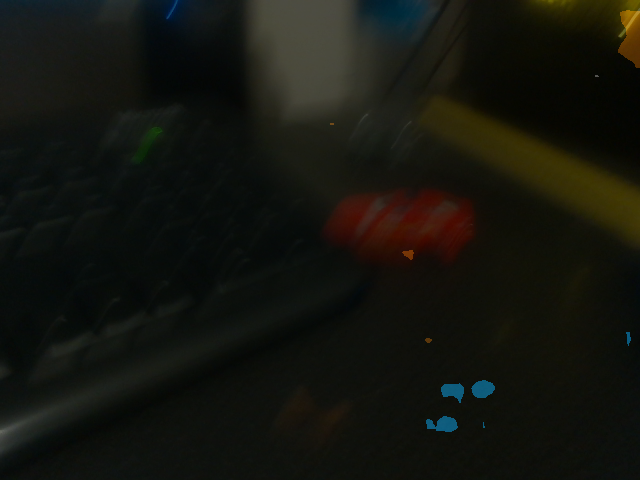


current car centroid:    [0.1679900832739268, -0.07940247695115567, 0.3271296387988567]
current bottle centroid: [0.16153435180117648, -0.2287192625194886, 0.5998696766719224]

Table of distances between centroids
-------------------------------------------------------------------------
|        | car    | bottle | tv    | person | chair |
-----------------------------------------------------------------------
| car    | -      | -      | -     | -      | -     |
| bottle | 0.311  | -      | -     | -      | -     |
--------------------------------------------------------------------------


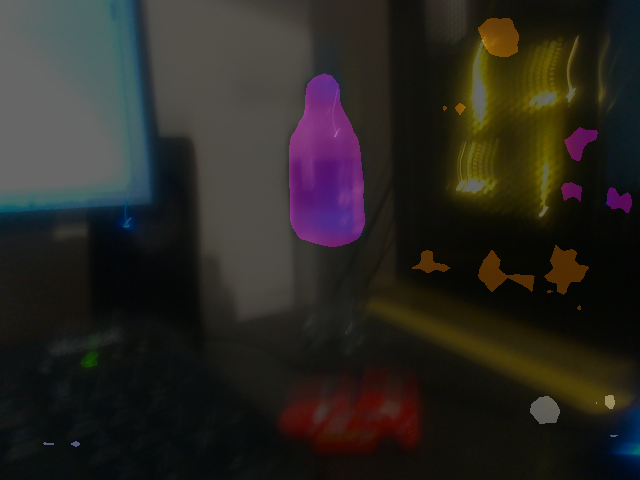


current car centroid:    [0.0839950416369634, -0.039701238475577834, 0.16356481939942835]
current bottle centroid: [0.09649554054369394, -0.15955272931557207, 0.5417097144583997]

Table of distances between centroids
-------------------------------------------------------------------------
|        | car    | bottle | tv    | person | chair |
-----------------------------------------------------------------------
| car    | -      | -      | -     | -      | -     |
| bottle | 0.397  | -      | -     | -      | -     |
--------------------------------------------------------------------------


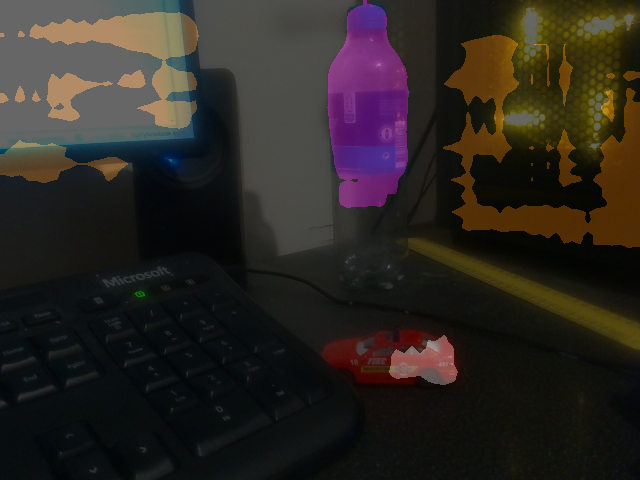


current car centroid:    [0.07811990602510513, 0.023289483560104112, 0.2143144760260637]
current bottle centroid: [0.07974355700647899, -0.17012305727593902, 0.5350553588329732]

Table of distances between centroids
-------------------------------------------------------------------------
|        | car    | bottle | tv    | person | chair |
-----------------------------------------------------------------------
| car    | -      | -      | -     | -      | -     |
| bottle | 0.375  | -      | -     | -      | -     |
--------------------------------------------------------------------------


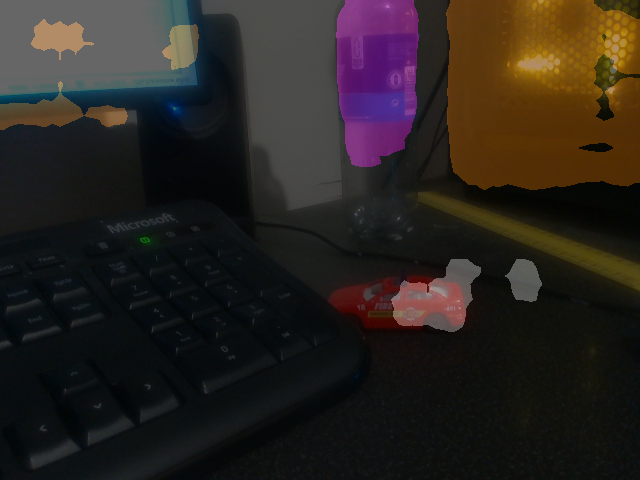


current car centroid:    [0.07985346340868109, 0.031149001935104684, 0.23539880954977038]
current bottle centroid: [0.07479514490757017, -0.19148965828639378, 0.5169478699391461]

Table of distances between centroids
-------------------------------------------------------------------------
|        | car    | bottle | tv    | person | chair |
-----------------------------------------------------------------------
| car    | -      | -      | -     | -      | -     |
| bottle | 0.359  | -      | -     | -      | -     |
--------------------------------------------------------------------------


KeyboardInterrupt: 

In [46]:
# === pyrealsense2 === #

import time
import torch
import cv2
#import numpy as np
from PIL import Image
import torchvision
from torchvision.models.segmentation import fcn_resnet50
import torchvision.transforms.functional as F
from torchvision.transforms.functional import convert_image_dtype
from torchvision.transforms import ToTensor
from torchvision import transforms

### ===================== stuff used for Mask R-CNN (start) ===================== ###

label_map = [
               (0, 0, 0),  # background 0
               (128, 0, 0), # aeroplane 1
               (0, 128, 0), # bicycle 2 
               (128, 128, 0), # bird 3
               (0, 0, 128), # boat 4
               (128, 0, 128), # bottle 5
               (0, 128, 128), # bus 6
               (128, 128, 128), # car 7
               (64, 0, 0), # cat
               (192, 0, 0), # chair
               (64, 128, 0), # cow
               (192, 128, 0), # dining table
               (64, 0, 128), # dog
               (192, 0, 128), # horse
               (64, 128, 128), # motorbike
               (192, 128, 128), # person 15
               (0, 64, 0), # potted plant
               (128, 64, 0), # sheep
               (0, 192, 0), # sofa
               (128, 192, 0), # train
               (0, 64, 128) # tv/monitor 20
]

def draw_segmentation_map(outputs):
    labels = torch.argmax(outputs.squeeze(), dim=0).detach().cpu().numpy()
    
    red_map = np.zeros_like(labels).astype(np.uint8)
    green_map = np.zeros_like(labels).astype(np.uint8)

    blue_map = np.zeros_like(labels).astype(np.uint8)
    
    for label_num in range(0, len(label_map)):
        index = labels == label_num
        red_map[index] = np.array(label_map)[label_num, 0]
        green_map[index] = np.array(label_map)[label_num, 1]
        blue_map[index] = np.array(label_map)[label_num, 2]
        
    segmented_image = np.stack([red_map, green_map, blue_map], axis=2)
    return segmented_image

def get_segment_labels(image, model, device):
    # transform the image to tensor and load into computation device
    image = transform(image).to(device)
    image = image.unsqueeze(0) # add a batch dimension
    outputs = model(image)

    return outputs

def image_overlay(image, segmented_image):
    alpha = 0.6 # how much transparency to apply
    beta = 1 - alpha # alpha + beta should equal 1
    gamma = 0 # scalar added to each sum
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
    cv2.addWeighted(segmented_image, alpha, image, beta, gamma, image)
    return image

### ===================== stuff used for Mask R-CNN (end) ===================== ###


# setup and start the RealSense camera
pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.rgb8, 30)
color_path = 'V00P00A00C00_rgb.avi'
depth_path = 'V00P00A00C00_depth.avi'
colorwriter = cv2.VideoWriter(color_path, cv2.VideoWriter_fourcc(*'XVID'), 30, (640,480), 5)
depthwriter = cv2.VideoWriter(depth_path, cv2.VideoWriter_fourcc(*'XVID'), 30, (640,480), 5)
profile = pipeline.start(config)
# Get the sensor once at the beginning. (Sensor index: 1)
sensor = pipeline.get_active_profile().get_device().query_sensors()[1]
# Set the exposure anytime during the operation
sensor.set_option(rs.option.exposure, 1600.000)
#frame = 0


# load model
model = fcn_resnet50(pretrained=True, progress=False)
model = model.eval()
    
# run for 13 iterations
for _ in range(13):
         
    # sleep is used to prevent to many frames coming in to fast
    time.sleep(.02)
    frames = pipeline.wait_for_frames()
    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()
    if not depth_frame or not color_frame:
        continue
    
    #frame = frames
    # extract data from frames
    color_image = np.asanyarray(color_frame.get_data())
    depthimg = np.asanyarray(depth_frame.data)
    
    img = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
    color_image = Image.fromarray(img)
    
    # =============== Using Mask R-CNN =============== #    
    
    # convert image to tensor
    convert_tensor = transforms.ToTensor()
    image_tensor = convert_tensor(color_image)
    # batch image
    batch_int = torch.stack([image_tensor])
    batch = convert_image_dtype(batch_int, dtype=torch.float)  
    normalized_batch = F.normalize(batch, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    # run model and parse output out from 'out'
    outputs = model(normalized_batch)['out']
    
    # skip the first two frames as they are always too dark
    if _ < 2:
        continue

    labels = torch.argmax(outputs.squeeze(), dim=0).detach().cpu().numpy()   
    # process the rgb image to get an rgb image with the mask overlay on the objects
    segimg = draw_segmentation_map(outputs)
    final_image = image_overlay(color_image, segimg)
    # display masked images for visual feedback
    display(Image.fromarray(final_image)) 
    # created bitmap of each object
    labels = torch.argmax(outputs.squeeze(), dim=0).detach().cpu().numpy()
    # update the bitmaps to match the current frame
    bitmap.update(labels)
    
    # create point cloud from depth frame
    pc = rs.pointcloud()
    pointcloud = pc.calculate(depth_frame)
    # used point cloud and bitmap to upadte the centroids
    centroid.update(pointcloud, bitmap)
    
    # print result
    print(centroid.get_centroids_str())
    displacements_table = centroid.get_centroid_displacements_str()
    print('\nTable of distances between centroids')
    print(displacements_table)
    
    
#depth_image = np.asanyarray(depth_frame.get_data())

pipeline.stop()

In [91]:
c=0

for p in pts1:
    #print(f'{p}\t{c}')
    
    c+=1
    if c==1000:
        break

In [84]:
# labels = torch.argmax(outputs.squeeze(), dim=0).detach().cpu().numpy()
# mask = labels > 0
# display(Image.fromarray(mask.astype(np.uint8)*255))
#m = mask.astype(np.uint8)*255

print(bitmap.person)
unique, counts = np.unique(bitmap.person, return_counts=True)
print(dict(zip(unique, counts)))

print('-'*35)

bitmap.update(labels)
print(bitmap.person)
unique, counts = np.unique(bitmap.person, return_counts=True)
dict(zip(unique))



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{0: 304252, 1: 2948}
-----------------------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [85]:
#mask = bitmap.bottle
mask = [bool(x) for x in bitmap.bottle.flatten()]
mask np.asanyarray(mask)

SyntaxError: invalid syntax (4052466316.py, line 3)

In [86]:
pts1[mask]

array([], shape=(0, 3), dtype=float32)

In [99]:
from matplotlib import pyplot as plt
m = segimg == 7

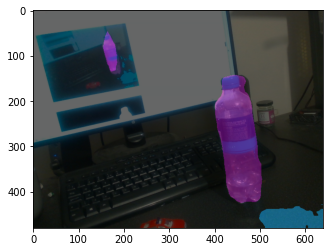

In [100]:
#np.info(m)
#labels.dtype()
#labels.shape
#np.info(np.uint8(labels))
plt.imshow(Image.fromarray(final_image))

In [102]:
# pointcloud of full scene

pc = rs.pointcloud()
pc.map_to(color_frame) # Map the point cloud to the given color frame.
pointcloud = pc.calculate(depth_frame) # Generate the pointcloud and texture mappings of depth map.
print(type(pointcloud))

w = rs.video_frame(depth_frame).width
h = rs.video_frame(depth_frame).height
print(w,h)

vertices = np.asanyarray(pointcloud.get_vertices()).view(np.float32).reshape(h, w, 3)
print('vertices')
print(vertices.shape)
print(type(vertices))
#print(vertices[:1,:,:])


#roi = verts[ymin:ymax, xmin:xmax, :]

#vertices = np.asanyarray(pointcloud.get_vertices())
#print(vertices)

# Visualize PLY
print("Saving to i.ply...")
file_path='.\\ply\\'+'file'+'.ply'
pointcloud.export_to_ply(file_path, color_frame)
print("Done")
# Read PLY
pointcloud = o3d.io.read_point_cloud(file_path)
o3d.visualization.draw_geometries([pointcloud])


<class 'pyrealsense2.pyrealsense2.points'>
640 480
vertices
(480, 640, 3)
<class 'numpy.ndarray'>
Saving to i.ply...
Done


In [103]:
print(type(depth_frame))
print(type(depth_frame.get_data()))
print(np.asanyarray(depth_frame.get_data()).shape)
print(np.asanyarray(depth_frame.get_data())[245:250, 390:405])
depth_frame.data = 0

<class 'pyrealsense2.pyrealsense2.depth_frame'>
<class 'pyrealsense2.pyrealsense2.BufData'>
(480, 640)
[[455 456 456 457 457 458 459 460 460 461 462   0   0 464   0]
 [456 456 456 457 458 458 459 460 461 462 462   0 464 464 465]
 [456 456 457 457 458 459 460 461 461 462   0 464 465 465 466]
 [456 457 457 458 458 459 460 461 462 463 464 465 466   0 467]
 [457 457 457 458 459 460 461 462 463 464 465 466 467 468 468]]


AttributeError: can't set attribute

In [104]:
print(type(color_frame))
print(type(color_frame.get_data()))
print(np.asanyarray(color_frame.get_data()).shape)

clr_frm = MyVideoFrame(frame)
clr_frm = color_frame
data = color_frame
clr_frm.data[245:250, 390:405] = 0
print(np.asanyarray(clr_frm.get_data())[245:250, 390:405])

<class 'pyrealsense2.pyrealsense2.video_frame'>
<class 'pyrealsense2.pyrealsense2.BufData'>
(480, 640, 3)


NameError: name 'MyVideoFrame' is not defined

In [105]:
# pointcloud of car only

print(type(pointcloud))

pointcloud = pc.calculate(depth_frame) # Generate the pointcloud and texture mappings of depth map.

<class 'open3d.cpu.pybind.geometry.PointCloud'>


In [106]:
pts = np.asarray(pointcloud.get_vertices())
print(pts)
pts1 = np.asarray([[x,y,z] for (x,y,z) in pts])




[(-0., -0., 0.) (-0., -0., 0.) (-0., -0., 0.) ... ( 0.,  0., 0.)
 ( 0.,  0., 0.) ( 0.,  0., 0.)]


In [107]:
pts1.shape

(307200, 3)

In [108]:
a = np.array([ [2], [0] ]) # row, col
#a
np.ravel_multi_index(a, (480,640))

array([1280])

In [109]:
r = np.random.rand(5,3)
print(r)
print()
print(r.flatten())

a = np.array([ [2, 2], [0, 1] ]) # row, col
print(np.ravel_multi_index(a, (4,4))) # list of rows/cols, shape

print(r[2,0])
flat_r = r.flatten()[8]
print(flat_r)
print()
print('reshaped')
reshaped = r.reshape( (5,3))
print(reshaped)
print()
print('vertices')
vertices = [(x,y,z) for [x,y,z] in reshaped]
print(vertices)

# pointcloud <- vertices ((480, 640, 3) <class 'numpy.ndarray'>) <- buffdata
#pcd = 

[[0.82545828 0.7719919  0.20784546]
 [0.7663622  0.0185641  0.44791325]
 [0.71747933 0.95133674 0.12316958]
 [0.67015458 0.40966417 0.78288481]
 [0.51130011 0.8610541  0.61519046]]

[0.82545828 0.7719919  0.20784546 0.7663622  0.0185641  0.44791325
 0.71747933 0.95133674 0.12316958 0.67015458 0.40966417 0.78288481
 0.51130011 0.8610541  0.61519046]
[8 9]
0.7174793312134562
0.12316958091503383

reshaped
[[0.82545828 0.7719919  0.20784546]
 [0.7663622  0.0185641  0.44791325]
 [0.71747933 0.95133674 0.12316958]
 [0.67015458 0.40966417 0.78288481]
 [0.51130011 0.8610541  0.61519046]]

vertices
[(0.8254582834703664, 0.7719919047821463, 0.20784545613937333), (0.7663621978639963, 0.018564102995242804, 0.4479132538862166), (0.7174793312134562, 0.9513367448849442, 0.12316958091503383), (0.6701545786335985, 0.40966416506351955, 0.7828848125730102), (0.5113001101029129, 0.8610541011224434, 0.6151904605736606)]


In [110]:
mypltcld = o3d.geometry.PointCloud()
pts2 = pts1.reshape((480,640,3))
mypltcld.points = o3d.utility.Vector3dVector(pts2.reshape)
o3d.visualization.draw_geometries([mypltcld])

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. open3d.cpu.pybind.utility.Vector3dVector()
    2. open3d.cpu.pybind.utility.Vector3dVector(arg0: numpy.ndarray[float64])
    3. open3d.cpu.pybind.utility.Vector3dVector(arg0: open3d.cpu.pybind.utility.Vector3dVector)
    4. open3d.cpu.pybind.utility.Vector3dVector(arg0: iterable)

Invoked with: <built-in method reshape of numpy.ndarray object at 0x7f68ebc28710>

In [111]:
# Save to .ply
print("Saving to i.ply...")
file_path='.\\ply\\'+'file'+'.ply'
pointcloud.export_to_ply(file_path, color_frame)
print("Done")
# Read PLY
pointcloud = o3d.io.read_point_cloud(file_path)
# Visualize PLY
o3d.visualization.draw_geometries([pointcloud])

#print(pointcloud.get_info())

#o3d.visualization.draw_geometries([pc])

Saving to i.ply...
Done


In [112]:
print(bitmap.car)
unique, counts = np.unique(bitmap.car, return_counts=True)
dict(zip(unique, counts))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


{0: 307200}

In [113]:
#depth_data = np.asanyarray(depth_frame.data)
#print(depth_data[350 ,400]) #[350:450, 400:500])
#print(depth_frame.get_distance(350, 400))

print(type(np.asanyarray(depth_frame.data)))

#pointcloud = pc.calculate(depth_frame)

<class 'numpy.ndarray'>


In [114]:
#depth_sensor = profile.get_device().first_depth_sensor()

intrinsic = o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)
print(intrinsic)

#pcd = o3d.geometry.PointCloud.create_from_depth_image(depth_frame,
#                                                    intrinsic,
#                                                    np.identity(4),
#                                                    depth_scale=1000.0,
#                                                    depth_trunc=1000.0,
#                                                    stride=1)                                                    


#pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
#print(np.asarray(pcd.points)[1, :])  
#o3d.visualization.draw_geometries([pcd])


PinholeCameraIntrinsic with width = 640 and height = 480.
Access intrinsics with intrinsic_matrix.


In [115]:
# get the distances of the car at each 

In [116]:

o3d.t.io.RealSenseSensor.list_devices()


[Open3D INFO] [0] Intel RealSense D435I: 920312070194
[Open3D INFO] 	depth_fps: [10 | 15 | 30 | 6 | 60 | 8 | 90]
[Open3D INFO] 	depth_resolution: [1280,720 | 256,144 | 480,270 | 640,360 | 640,480 | 848,480]
[Open3D INFO] 	depth_format: [RS2_FORMAT_Z16]
[Open3D INFO] 	color_fps: [10 | 15 | 30 | 6 | 60 | 8]
[Open3D INFO] 	visual_preset: []
[Open3D INFO] 	color_resolution: [1280,720 | 1920,1080 | 424,240 | 640,480]
[Open3D INFO] 	color_format: [RS2_FORMAT_BGR8 | RS2_FORMAT_BGRA8 | RS2_FORMAT_RGB8 | RS2_FORMAT_RGBA8 | RS2_FORMAT_Y16 | RS2_FORMAT_YUYV]
[Open3D INFO] Open3D only supports synchronized color and depth capture (color_fps = depth_fps).


True

In [117]:
import json
import open3d as o3d
with open(config_filename) as cf:
    rs_cfg = o3d.t.io.RealSenseSensorConfig(json.load(cf))

rs = o3d.t.io.RealSenseSensor()
rs.init_sensor(rs_cfg, 0, bag_filename)
rs.start_capture(True)  # true: start recording with capture
for fid in range(150):
    im_rgbd = rs.capture_frame(True, True)  # wait for frames and align them
    # process im_rgbd.depth and im_rgbd.color

rs.stop_capture()

NameError: name 'config_filename' is not defined